# Introduction


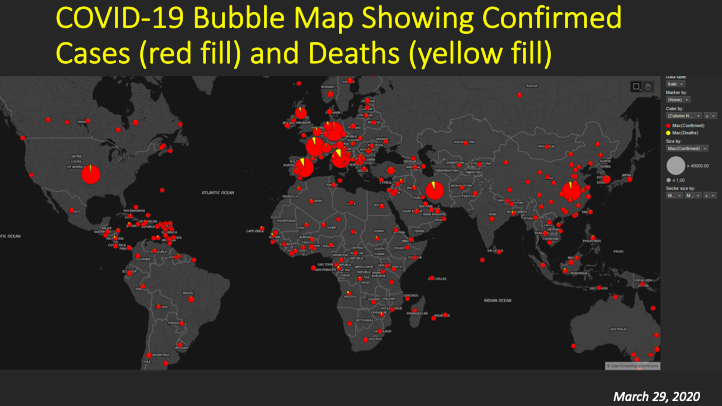

#### Beginning in January of 2020 we have witnessed a pandemic the likes of which very few people have ever seen. Nearly 800,000 people (as of March 29, 2020) have contracted this COVID-19 disease as it has spread from China, Middle East, Europe, Africa and the US, killing nearly 40,000 souls. Is there anything that we as individuals can do to better understand how this disease has spread throughout the world, and how many more are yet to be affected by COVID-19? This is at the heart of of this notebook as we attempt to develop tools to forecast Confirmed Cases and Deaths using the data being furnished by Johns Hopkins on a daily basis.  

## Forecast Estimated of Confirmed Cases and Deaths (April 6, 2020)

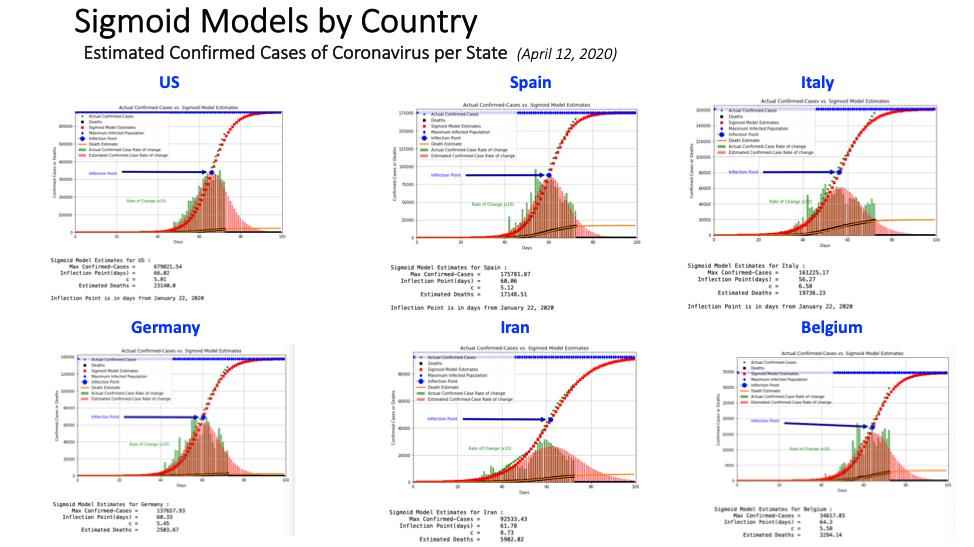

Our primary objective is to commit our ideas, concepts and methods into code using the data that we are being furnished. We want to share these concepts with true Data Scientists so that hopefully we can better understand and forecast this pandemic. The model being presented in this notebook employs the most current data being updated every day. We are using ML to generate predictive estimations of the maximum expected Confirmed Cases by country/region and create reasonable timelines for these occurrences. 

Most of us are familiar with the data. China (mainly Hubei), has been at the epicenter of this pandemic starting around in mid January of 2020, and from there on to Europe and then around the world. Since the Far East is more mature in the evolution of this pandemic, we are already seeing trends in the Far East flatten out in their numbers of confirmed cases of COVID; namely Hubei, China and South Korea. Most countries; however, are still in the exponential growth stage of their COVID development. Using the data from Hubei and South Korea we were able to fit regression curves to these data to model the entire evolutionary trend of these data. Of noticeable importance was a version of the Sigmoid curve-fit equation as shown below. Yes, there were equations that had better fits (r2) to these data; however, the Sigmoid equation has fit parameters that represent meaningful parameters to us the users.


                        y = a/(1 + exp(-(days - b)/c))

From the Sigmoid equation the parameter "a" relates to the maximum number of estimated Confirmed Cases that we might expect. From the data that we have reviewed we have found two excellent examples (shown below) that allow us to fit these data over the entire range of the features found in the Sigmoid curve. The parameter "b" relates to the inflection point on the curve that is at the 50th percentile. For most countries we are just approaching this inflection point in the data. The Sigmoid equation does a reasonable job of estimating this parameter, but with such explosive growth in confirmed cases this is still very hard to estimate accurately. Once predicted, we have a reasonable estimates of Confirmed Cases beyond the data we have today. "c" defines the rate of slope in the initial phase of Confirmed Cases. I am not an Epidemiologist and our estimates are strictly based on the data at hand.   

These COVID data trends have certain characteristics by country/region as pointed out by Tomas Pueyo in the Medium article, "Coronavirus: The Hammer and the Dance". Tomas did an excellent job of describing these artifacts in the Hubei data in relationship to what he called the "Hammer and the Dance". Even with the break in slope and inconsistencies in the Hubei Confirmed Cases data, the Sigmoid model still fit the data rather well over the entire range of data having an r2 of 0.9943. The South Korean data appears be exhibiting similar inconsistencies too, especially with the recent data. There is a late, new trend that is higher than our estimate as the result of the "Dance" phase. In the differential rate curve of Confirmed Cases for South Korea the data confirms that we are presently in that Dance phase with low, but persistent cases being reported daily. 

#### Notice: as a non-programmer I have studied and initially used code from covid-19-digging-a-bit-deeper and COVID Global Forecast: SIR model + ML regressions notebooks as go-by's in the preparation of this notebook.

March 30, 2020


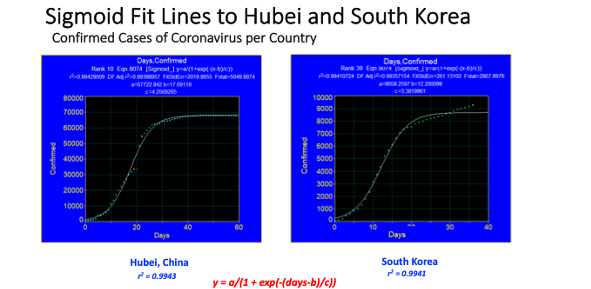

In this study we fit the most current COVID data to our Sigmoid equation model generating an estimating of the maximum number of Confirmed Cases expected and the 50th Percentile or inflection point in these data. Since very few countries or regions have even approached the maximum Confirmed Cases value as seen by the flattening of the curve, then it is the inflection point that might give us rough estimates of where we are on that curve, and what me might anticipate for the future. Again, these are only estimates as shown below with uncertainty. As of this date we have not quantified the uncertainty, but judging by the Hubei and South Korea, this uncertainty will decrease with time. We are expecting that the day-to-day rate of change in the number of Confirmed Cases will very useful in helping us understand where we are on the evolutionary timeline. 

# COVID-19 has been a paradigm shift to our way of life:
- We now live in a world of social distancing, lockdowns and isolation. Our new norm is centered in and around our homes that  hopefully has brought our families closer together. 
- However, in watching this pandemic evolve, have we can learn from what we have observed.  Can we use this to our advantage in the future? 
- In comparison to the past we now live in a global society. We can be on one side of the world in the morning and on another continent later that afternoon. Our transportation capabilities have brought us much closer as a society, but has this global technology outgrown our abilities to cope and contain such epidemics? 
- On the bright side as the result of this experience, will we should be able to react more affectively in the future to avoid a situation like this from ever happening again(?). 

# References and Acknowledgements
**Data:**
* [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE](https://github.com/CSSEGISandData/COVID-19)

* [Novel Coronavirus (COVID-19) Cases, provided by JHU CSSE ](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)

* [COVID19 Global Forecasting (Week 1)](https://www.kaggle.com/c/covid19-global-forecasting-week-1)

* [ncov_cases](https://www.arcgis.com/home/item.html?id=c0b356e20b30490c8b8b4c7bb9554e7c#data)



**Interesting Articles:**

* [Coronavirus: The Hammer and the Dance](https://medium.com/@tomaspueyo/coronavirus-the-hammer-and-the-dance-be9337092b56)



**Notebooks:**

* [COVID-19: Digging a Bit Deeper](https://www.kaggle.com/abhinand05/covid-19-digging-a-bit-deeper)

* [Coronavirus (COVID-19) Visualization & Prediction](https://www.kaggle.com/therealcyberlord/coronavirus-covid-19-visualization-prediction)

* [COVID Global Forecast: SIR model + ML regressions](https://www.kaggle.com/saga21/covid-global-forecast-sir-model-ml-regressions)




**Visual Dashboards:**

* [JHU Dashboard Web](https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)





# Code:

To facilitate the creation of this notebook, I have used the notebook COVID-19: Digging a bit deeper as a go-by for the input of data into this notebook.

In [1]:
#code used from COVID-19: Digging a bit deeper
import numpy as np
import pandas as pd
import wget

import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import math

import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

from pylab import * 

from statsmodels.tsa.ar_model import AR
from sklearn.linear_model import LinearRegression

from scipy import integrate, optimize
from scipy.optimize import curve_fit
from matplotlib.pyplot import *

from colorama import Fore

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


from pathlib import Path
data_dir = Path('./input/')

import os
#os.listdir(data_dir)


Bad key "text.kerning_factor" on line 4 in
/Users/craig/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution






## Load the Newest COVID Data from Johns Hopkins:

Johns Hopkins data from [COVID-19](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series). 

In [2]:
! rm *.csv

urls = ['https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv', 
        'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'] 
        #'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv']

for url in urls:
    filename = wget.download(url)

In [3]:
# dataset
# --------

conf_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
#recv_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [4]:
conf_df.columns


Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20',
       '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20',
       '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20',
       '4/9/20', '4/10/20'

In [5]:
dates = conf_df.columns[4:]

conf_df_long = conf_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

deaths_df_long = deaths_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Deaths')

#recv_df_long = recv_df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
#                            value_vars=dates, var_name='Date', value_name='Recovered')

#full_table = pd.concat([conf_df_long, deaths_df_long['Deaths'], recv_df_long['Recovered']], 
#                       axis=1, sort=False)
full_table = pd.concat([conf_df_long, deaths_df_long['Deaths']], 
                       axis=1, sort=False)


full_table.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0,0


In [6]:
# removing county wise data to avoid double counting

full_table = full_table[full_table['Province/State'].str.contains(',')!=True]

full_table['Country/Region'] = full_table['Country/Region'].replace('Korea, South', 'South Korea')

In [7]:
full_table.to_csv('/Users/craig/Documents/src/COVID-19-master/kaggle/input/covid19dailydata/complete_data_new_format.csv', index=False)

### Now we are reading in the csv file (ToDo: fix this)

In [8]:
cleaned_data = pd.read_csv('./kaggle/input/covid19dailydata/complete_data_new_format.csv', parse_dates=['Date'])
cleaned_data.head()
#print(cleaned_data)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0


In [9]:
print("External Data")
print(f"Earliest Entry: {cleaned_data['Date'].min()}")
print(f"Last Entry:     {cleaned_data['Date'].max()}")
print(f"Total Days:     {cleaned_data['Date'].max() - cleaned_data['Date'].min()}")

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-04-12 00:00:00
Total Days:     81 days 00:00:00


In [10]:
cleaned_data.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# cases 
#cases = ['confirmed', 'deaths', 'recovered', 'active']
cases = ['confirmed', 'deaths']



# Active Case = confirmed - deaths - recovered
#cleaned_data['active'] = cleaned_data['confirmed'] - cleaned_data['deaths'] - cleaned_data['recovered']

# replacing Mainland china with just China
cleaned_data['country'] = cleaned_data['country'].replace('Mainland China', 'China')

# filling missing values 
cleaned_data[['state']] = cleaned_data[['state']].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)
cleaned_data.rename(columns={'Date':'date'}, inplace=True)

data = cleaned_data


# Machine Learning Forecasting

## Prepare Data for ML Estimates: 

### Population data for normalization in the future:

Enter Population to be used in the future. We can also take these data from './kaggle/input/covid-data/population_by_country_2020.csv'. 

In [11]:
pop_italy = 60486683.
pop_skorea = 51000000.
pop_spain = 46749696.
pop_france = 65273511
pop_iran = 83992949.
pop_US = 331002651.
pop_UK = 67784927.
pop_japan = 127000000.
pop_germany = 83000000.
pop_mexico = 129000000.
pop_singapore = 5837230.

## List of Countries being studied in this Notebook

In [12]:
plot_titles = ['US','Spain','Italy','France','Germany','Iran','Belgium','Switzerland','Netherlands','South Korea']

# Estimates from Basic Sigmoid Function fit to Confirmed Cases:

As discussed in the introduction, the Sigmoid equation has fit the Hubei, China and South Korea data very well, and the fit parameters are meaningful for our modeling of Confirmed Cases. The version of the Sigmoid equation that we are using is shown in the following figure. 


In [13]:
train = data
xdata_range=[]
for i in range(0, 100, 1):
    xdata_range.append(i)

## Estimations of Maximum Infected Population and Deaths (per country):

In the plots below, the Sigmoid model match to the actual Confirmed Case data  is very good for the current data. In areas with exposive growth like the US, we still might not have enough data to accurately predict the coming trends and make an accurate estimate the maximum number of Confirmed Cases. The flattening in the rate of change for the cumulative Confirmed Case data could suggests; however, that the rapid growth period is coming to an end???  That will remain to be seen. That is what was seen in Hubei and South Korea; however, Europe has had a broader Gaussian distribution than what was observed in the Far East. 

/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



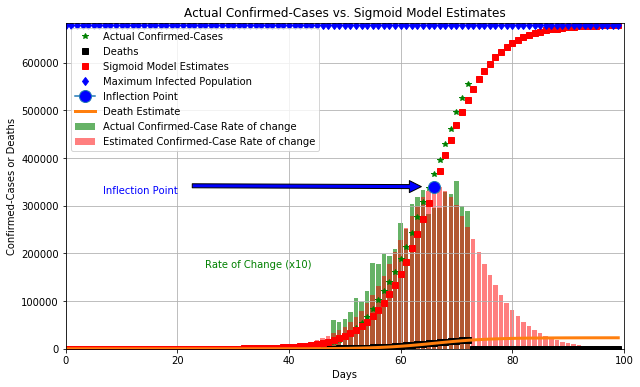


Sigmoid Model Estimates for US :
      Max Confirmed-Cases = 	 679821.54
   Inflection Point(days) =  	 66.02
	 	    	c = 	 5.01
	 Estimated Deaths = 	 23140.0

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



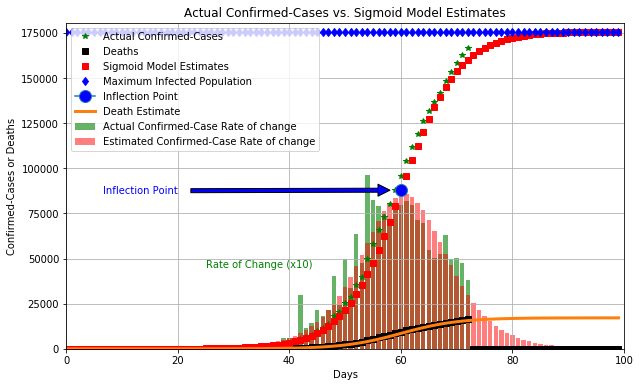


Sigmoid Model Estimates for Spain :
      Max Confirmed-Cases = 	 175781.87
   Inflection Point(days) =  	 60.06
	 	    	c = 	 5.12
	 Estimated Deaths = 	 17148.51

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



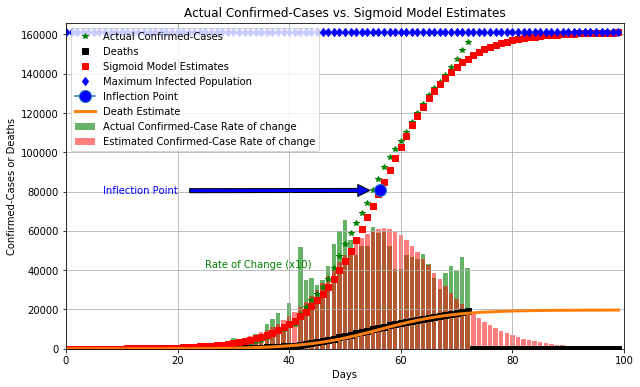


Sigmoid Model Estimates for Italy :
      Max Confirmed-Cases = 	 161225.17
   Inflection Point(days) =  	 56.27
	 	    	c = 	 6.58
	 Estimated Deaths = 	 19736.23

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning:

overflow encountered in exp



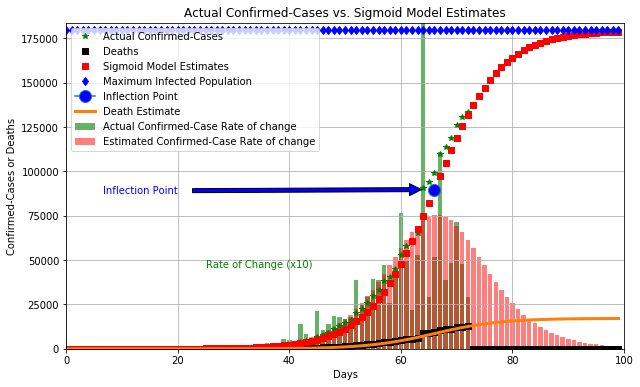


Sigmoid Model Estimates for France :
      Max Confirmed-Cases = 	 179528.09
   Inflection Point(days) =  	 66.0
	 	    	c = 	 5.93
	 Estimated Deaths = 	 17153.09

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



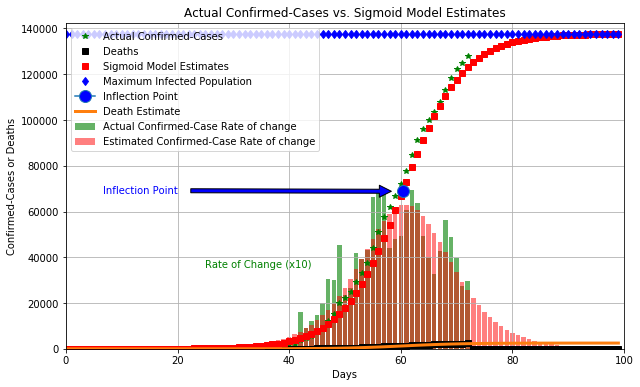


Sigmoid Model Estimates for Germany :
      Max Confirmed-Cases = 	 137657.93
   Inflection Point(days) =  	 60.33
	 	    	c = 	 5.45
	 Estimated Deaths = 	 2503.67

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



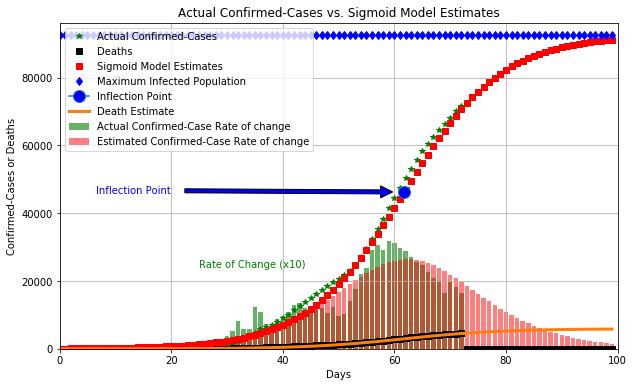


Sigmoid Model Estimates for Iran :
      Max Confirmed-Cases = 	 92533.43
   Inflection Point(days) =  	 61.78
	 	    	c = 	 8.73
	 Estimated Deaths = 	 5902.02

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



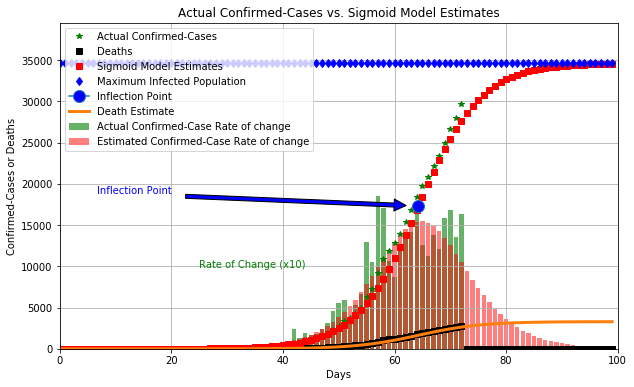


Sigmoid Model Estimates for Belgium :
      Max Confirmed-Cases = 	 34617.03
   Inflection Point(days) =  	 64.3
	 	    	c = 	 5.58
	 Estimated Deaths = 	 3294.14

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



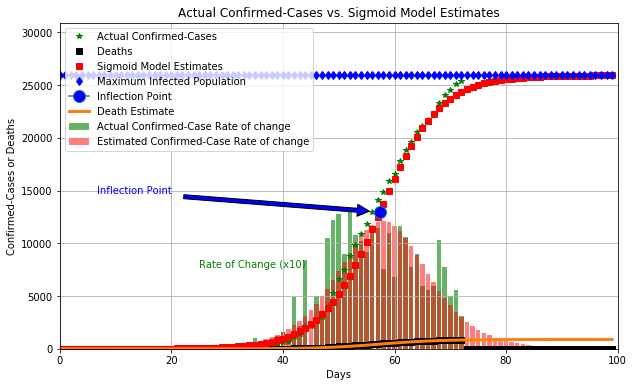


Sigmoid Model Estimates for Switzerland :
      Max Confirmed-Cases = 	 25927.1
   Inflection Point(days) =  	 57.36
	 	    	c = 	 5.34
	 Estimated Deaths = 	 884.84

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



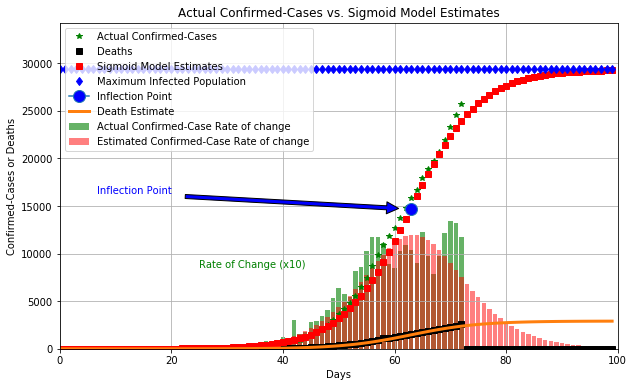


Sigmoid Model Estimates for Netherlands :
      Max Confirmed-Cases = 	 29330.7
   Inflection Point(days) =  	 62.88
	 	    	c = 	 6.12
	 Estimated Deaths = 	 2911.69

Inflection Point is in days from January 22, 2020


/Users/craig/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



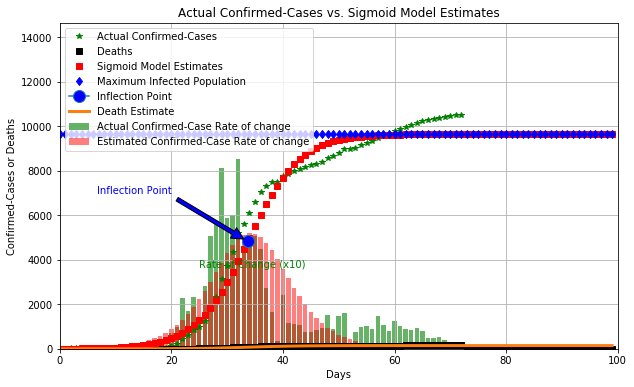


Sigmoid Model Estimates for South Korea :
      Max Confirmed-Cases = 	 9651.18
   Inflection Point(days) =  	 33.68
	 	    	c = 	 4.62
	 Estimated Deaths = 	 144.4

Inflection Point is in days from January 22, 2020


In [14]:
country_max=[]
country_inflect = []
country_c = []
deaths=[]


for k in range(0,len(plot_titles),1):

    confirmed_total_date_country = train[train['country']==plot_titles[k]].groupby(['date']).agg({'confirmed':['sum']})
    fatalities_total_date_country = train[train['country']==plot_titles[k]].groupby(['date']).agg({'deaths':['sum']})
    total_date_country = confirmed_total_date_country.join(fatalities_total_date_country)

    grouped_country = data[data['country'] == plot_titles[k]].reset_index()
    death = grouped_country.deaths
    conf  = grouped_country.confirmed
    date = grouped_country.date
    # Estimated Death Ratio for each country
    m,b = polyfit(conf, death, 1) 
    #print('Slope of Confirmed to Death ratio =', m)

    country_df = total_date_country[9:]
    country_df['day_count'] = list(range(1,len(country_df)+1))
    country_df

    ydata = [i for i in country_df.confirmed['sum'].values]
    xdata = country_df.day_count
    ydata = np.array(ydata, dtype=float)
    xdata = np.array(xdata, dtype=float)

    xdata_offset=[]
    ydata_offset=[]
    offset = 0

    def myFunc(days, InfPop, Inflection, c):
        y = (InfPop/(1+np.exp(-(days-Inflection)/c)))      
        return y

    for i in range(offset, len(xdata-offset), 1):
        xdata_offset.append(xdata[i]-offset)
        ydata_offset.append(ydata[i]-offset)
        
    x0 = np.array(xdata_offset, dtype=float)   
    y0 = np.array(ydata_offset, dtype=float)
    
    #fit the data, return the best fit parameters and the covariance matrix
    popt, pcov = curve_fit(myFunc, x0, y0)
    deaths.append(m*popt[0])
    #print('Country =', plot_titles[k] )

    
   
    '''
      Actual Data 
    '''

    #ydata_offset = np.hstack((ydata_offset, np.zeros(30) + np.nan))     
    x = np.array(xdata_range, dtype=float)
    y = np.hstack((y0, np.zeros(100-len(xdata)) + 0))     
   
    plt.figure(1,figsize=(10, 6))
    plt.plot(x, y, "g*" , label="Actual Confirmed-Cases")
    plt.plot(x, y*m, "ks", label="Deaths")

    #Calculate rate of change in Confirmed Cases
    ydiff0 = np.diff(y)
    ydiff  = np.hstack((0, ydiff0*10))
    plt.bar(x, ydiff, align='center', alpha=.6, color='green', label='Actual Confirmed-Case Rate of change')

 
    '''
      These are the Sigmoid Model Plots
    '''
    #xdata_range=[]
    ymaxpred=[]
    ypred=[]

    for i in range(0, 100, 1):
        #xdata_range.append(i)
        ymaxpred.append(popt[0])
        ypred.append((popt[0]/(1+np.exp(-(xdata_range[i] - popt[1])/popt[2])))  )

    #ypred = np.array(ypred, dtype=float)
    ydiff0=np.diff(ypred)
    ydiff = np.hstack((0,ydiff0*10))


    plt.plot(xdata_range, myFunc(xdata_range, popt[0], popt[1], popt[2]), "rs", label='Sigmoid Model Estimates')
    plt.bar(xdata_range, ydiff,align='center', alpha=.5, color='red', label='Estimated Confirmed-Case Rate of change')
    plt.plot(xdata_range, ymaxpred, 'bd' , linewidth=1, label='Maximum Infected Population')
    plt.plot(popt[1],popt[0]/2,label='Inflection Point', marker='o', markerfacecolor='blue', markersize=12)
    plt.plot(xdata_range,myFunc(xdata_range, popt[0], popt[1], popt[2])*m, linewidth=3,label ='Death Estimate')
    plt.xlabel('Days')
    plt.ylabel('Confirmed-Cases or Deaths')
    plt.xlim(0,100)
    plt.ylim(0,max(myFunc(xdata_range, popt[0], popt[1], popt[2]))+5000)
    plt.grid(True)
    plt.title("Actual Confirmed-Cases vs. Sigmoid Model Estimates")
    plt.legend(loc='upper left')
    plt.annotate('Inflection Point', color='blue', xy=(popt[1],popt[0]/2),  xycoords='data',
                xytext=(0.2, 0.5), textcoords='axes fraction',
                arrowprops=dict(facecolor='blue', shrink=0.05),
                horizontalalignment='right', verticalalignment='top',
                )

    plt.annotate('Rate of Change (x10)', color='green', xy=(popt[1],popt[0]/3 ),  xycoords='data',
                xytext=(.25, .25), textcoords='axes fraction',
                )
   
    
    plt.show()

    print()
    print("Sigmoid Model Estimates for", plot_titles[k],":")
    print("      Max Confirmed-Cases =",'\t', round(popt[0],2))
    print("   Inflection Point(days) = ",'\t', round(popt[1],2))
    print('\t', '\t',"   \tc =" , '\t',round(popt[2],2))
    print( '\t','Estimated Deaths =','\t',round(deaths[k],2))
    print()
    print('Inflection Point is in days from January 22, 2020')


    country_max.append(popt[0])
    country_inflect.append(popt[1])
    country_c.append(popt[2])

# Conclusions:

In this study we fit the most current COVID data to our Sigmoid equation model generating an estimating of the maximum number of Confirmed Cases expected and the 50th Percentile or inflection point for these data. Since very few countries or regions have even approached the maximum Confirmed Cases value as seen by the flattening of the Confirmed curve, then it is the inflection point that might give us a better rough estimates of where we are on that curve and what me might anticipate for the near future. In additon we have used the ration of Confirmed Cases vs. Deaths by country from our downloaded data to make an estimate on the number of estimated deaths that we might anticipate. Again, these are estimates based only on the JH time series data with no calculated uncertainty at this point. Our forecasts for the US are probably undercalling the estimated number of Confirmed Cases and Deaths. 

The Inflection point is at the 50 percentile of a Gaussian distribution for the daily rate of Confirmed Cases. Our observations from South Korea shows a near Gaussian distribution and then a long tail at the end. We are not modeling that tail, but it could be significant if we are too early in the slackening of the lockdowns and our COVID awareness per Andy Slavitt's atricle in Medium (March 30th). 


In [15]:
print('----------------------------------------------------------------------------------------------------------')
print('Index', '\t','Country','Max_Est_Confirmed\t','Est_Deaths\t','Inflec_Point(days)\t','c')
print('----------------------------------------------------------------------------------------------------------')

for k in range(0,len(plot_titles),1):
    print(k,'\t', plot_titles[k][:5],'\t','\t',round(country_max[k]),'\t',round(deaths[k],4),'\t','\t',round(country_inflect[k],1),'\t','\t',round(country_c[k],2))
    
print() 
print('Inflection Point is in days from January 22, 2020')




----------------------------------------------------------------------------------------------------------
Index 	 Country Max_Est_Confirmed	 Est_Deaths	 Inflec_Point(days)	 c
----------------------------------------------------------------------------------------------------------
0 	 US 	 	 679822.0 	 23139.997 	 	 66.0 	 	 5.01
1 	 Spain 	 	 175782.0 	 17148.5123 	 	 60.1 	 	 5.12
2 	 Italy 	 	 161225.0 	 19736.2288 	 	 56.3 	 	 6.58
3 	 Franc 	 	 179528.0 	 17153.0871 	 	 66.0 	 	 5.93
4 	 Germa 	 	 137658.0 	 2503.6726 	 	 60.3 	 	 5.45
5 	 Iran 	 	 92533.0 	 5902.0173 	 	 61.8 	 	 8.73
6 	 Belgi 	 	 34617.0 	 3294.1418 	 	 64.3 	 	 5.58
7 	 Switz 	 	 25927.0 	 884.8383 	 	 57.4 	 	 5.34
8 	 Nethe 	 	 29331.0 	 2911.6892 	 	 62.9 	 	 6.12
9 	 South 	 	 9651.0 	 144.3985 	 	 33.7 	 	 4.62

Inflection Point is in days from January 22, 2020


As of this date we have not quantified the uncertainty, but judging by the Hubei and South Korea data, as the trends establish themselves uncertainty will decrease with time. The day-to-day rate of change in the number of Confirmed Cases is very useful in helping us to understand where we are on the evolutionary timeline of COVID development, and if the rate of confirmed cases has hit a maxima.